In [13]:
# Dataset 클래스와 전처리
if '__file__' in globals():
    import os, sys
    sys.path.append(os.path.join(os.path.dirname(__file__), '..'))

import math
import numpy as np
import dezero
import dezero.functions as F
from dezero import optimizers
from dezero.models import MLP

In [3]:
# dataset 클래스 구현
class Dataset:
    def __init__(self, train=True):
        self.train = train
        self.data = None
        self.label = None
        self.prepare()

    def __getitem__(self, index):
        assert np.isscalar(index)
        if self.label is None:                     
            return self.data[index], None
        else:
            return self.data[index], self.label[index]

    def __len__(self):          # len(x) 처럼 사용하고 len() 호출
        return len(self.data)
        
    def prepare(self):
        pass

# 초기화 때 train 인수를 받아 학습인지 테스트 데이터셋인지 구별하기 위한 플래그.
# 자식 클래스에서 prepare 메서드 사용
# __getitem__ : 파이썬 특수메서드로 x[0], x[1]처럼 괄호를 사용해 접근할 때의 동작을 정의. 여기선 단순히 지정된 인덱스에 위치하는 데이터를 꺼냄.

In [8]:
class Spiral(Dataset):
    def prepare(self):
        self.data, self.label = get_spiral(self.train)

import dezero

train_set = dezero.datasets.Spiral(train=True)
print(train_set[0])
print(len(train_set))

(array([-0.13981389, -0.00721657], dtype=float32), 1)
300


In [26]:
train_set = dezero.datasets.Spiral()
batch_index = [0,1,2]
batch = [train_set[i] for i in batch_index]
# batch = [(data_0, label_0), (data_1, label_1), (data_2, label_2)]

x = np.array([example[0] for example in batch]) # ndarray로 변환
t = np.array([example[1] for example in batch])

print(x, x.shape)
print(t, t.shape)

[[-0.13981389 -0.00721657]
 [ 0.37049392  0.5820947 ]
 [ 0.1374263  -0.17179643]] (3, 2)
[1 1 2] (3,)


In [22]:
import math
import numpy as np
import dezero
import dezero.functions as F
from dezero import optimizers
from dezero.models import MLP

max_epoch = 300
batch_size = 30
hidden_size = 10
lr = 1.0

train_set = dezero.datasets.Spiral(train=True)
model = MLP((hidden_size, 3))
optimizer = optimizers.SGD(lr).setup(model)

data_size = len(train_set)
max_iter = math.ceil(data_size / batch_size)

epochs = []
losses = []
for epoch in range(max_epoch):
    # Shuffle index for data
    index = np.random.permutation(data_size)
    sum_loss = 0

    for i in range(max_iter):
        # Create minibatch
        batch_index = index[i * batch_size:(i + 1) * batch_size]
        batch = [train_set[i] for i in batch_index]
        batch_x = np.array([example[0] for example in batch])
        batch_t = np.array([example[1] for example in batch])

        y = model(batch_x)
        loss = F.softmax_cross_entropy(y, batch_t)
        model.cleargrads()
        loss.backward()
        optimizer.update()

        sum_loss += float(loss.data) * len(batch_t)

    # Print loss every epoch
    avg_loss = sum_loss / data_size
    print('epoch %d, loss %.2f' % (epoch + 1, avg_loss))
    epochs.append(epoch)
    losses.append(loss.data)

epoch 1, loss 1.13
epoch 2, loss 1.05
epoch 3, loss 0.95
epoch 4, loss 0.92
epoch 5, loss 0.87
epoch 6, loss 0.89
epoch 7, loss 0.84
epoch 8, loss 0.78
epoch 9, loss 0.80
epoch 10, loss 0.79
epoch 11, loss 0.78
epoch 12, loss 0.76
epoch 13, loss 0.77
epoch 14, loss 0.76
epoch 15, loss 0.76
epoch 16, loss 0.77
epoch 17, loss 0.78
epoch 18, loss 0.74
epoch 19, loss 0.74
epoch 20, loss 0.72
epoch 21, loss 0.73
epoch 22, loss 0.74
epoch 23, loss 0.77
epoch 24, loss 0.73
epoch 25, loss 0.74
epoch 26, loss 0.74
epoch 27, loss 0.72
epoch 28, loss 0.72
epoch 29, loss 0.72
epoch 30, loss 0.73
epoch 31, loss 0.71
epoch 32, loss 0.72
epoch 33, loss 0.72
epoch 34, loss 0.71
epoch 35, loss 0.72
epoch 36, loss 0.71
epoch 37, loss 0.71
epoch 38, loss 0.70
epoch 39, loss 0.71
epoch 40, loss 0.70
epoch 41, loss 0.71
epoch 42, loss 0.70
epoch 43, loss 0.70
epoch 44, loss 0.70
epoch 45, loss 0.69
epoch 46, loss 0.69
epoch 47, loss 0.71
epoch 48, loss 0.70
epoch 49, loss 0.69
epoch 50, loss 0.69
epoch 51,

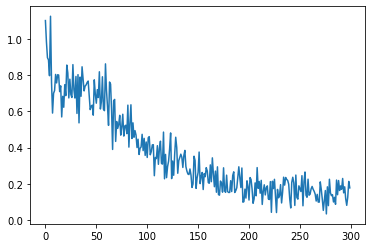

In [25]:
import matplotlib.pyplot as plt
plt.plot(epochs, losses)

In [ ]:
class Dataset:
    def __init__(self, train=True, transform=None, target_transform=None):
        self.train = train
        self.transform = transform
        self.target_transform = target_transform
        if self.transform is None:          # 현재는 받은 인수를 그대로 반환
            self.transform = lambda x: x
        if self.target_transform is None:
            self.target_transform = lambda x: x

        self.data = None
        self.label = None
        self.prepare()

    def __getitem__(self, index):
        assert np.isscalar(index)
        if self.label is None:
            return self.transform(self.data[index]), None
        else:
            return self.transform(self.data[index]),\
                   self.target_transform(self.label[index])

    def __len__(self):
        return len(self.data)

    def prepare(self):
        pass

# 초기화 시 transform과 target_transform을 받는다
# transform : 입력 데이터 하나에 대한 변환을 처리, target_transform 레이블 하나에 대한 변환을 처리.

In [ ]:
# Ex
def f(x):
    y = x / 2.0
    return y

train_set = dezero.datasets.Spiral(transform=f) # transform으로 입력 데이터를 1/2로 스케일 변환.

# 데이터 정규화와 이미지 데이터 변환 등 전처리 시 사용되는 변환들이 transforms.py에 있음.

from dezero import transforms
f = transforms.Normalize(mean=0.0, std=2.0)         # (x - mean) / std 라는 변환이 이뤄짐.
f = transforms.Compose([transforms.Normalize(mean=0.0, std=2.0), transforms.AsType(np.float64)])    
# transforms.Compose 클래스는 주어진 변환 목록을 앞에서부터 순서대로 처리. 정규화를 먼저하고 연이어 데이터 타입을 np.float54로 변환.